1.1. Изучение файлов

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from numpy import inf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [4]:
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [6]:
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

1.2. Вычисление эффективности обогащения для признака rougher.output.recovery. Поиск MAE между расчётами и значением признака. 

In [8]:
proba = pd.DataFrame()
proba['true'] = df_train['rougher.output.recovery']
proba['counted'] = (df_train['rougher.output.concentrate_au'] * 
                           (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))/(df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))
proba['counted'] = proba['counted'] * 100 
proba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
true       14287 non-null float64
counted    14577 non-null float64
dtypes: float64(2)
memory usage: 263.6 KB


In [9]:
proba = proba.dropna()
proba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 2 columns):
true       14287 non-null float64
counted    14287 non-null float64
dtypes: float64(2)
memory usage: 334.9 KB


In [10]:
print('MAE при удалении пропущенных значений на нули =', mean_absolute_error(proba['true'], proba['counted']))
print('Среднее значение столбца counted и столбца true:', proba['true'].mean(), proba['counted'].mean())

MAE при удалении пропущенных значений на нули = 9.444891926100695e-15
Среднее значение столбца counted и столбца true: 82.39420120842004 82.39420120842004


1.3. Анализ признаков, отсутсвующих в тестовой выборке

In [12]:
test_columns = df_test.columns
train_columns = df_train.columns
both = []
for el in train_columns:
    if el not in test_columns:
        both.append(el)
both = pd.Series(both)
both

dropped_train = df_train.drop(both, axis = 1) 
dropped_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
date                                          16860 non-null object
primary_cleaner.input.sulfate                 15553 non-null float64
primary_cleaner.input.depressant              15598 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                15875 non-null float64
primary_cleaner.state.floatbank8_a_air        16820 non-null float64
primary_cleaner.state.floatbank8_a_level      16827 non-null float64
primary_cleaner.state.floatbank8_b_air        16820 non-null float64
primary_cleaner.state.floatbank8_b_level      16833 non-null float64
primary_cleaner.state.floatbank8_c_air        16822 non-null float64
primary_cleaner.state.floatbank8_c_level      16833 non-null float64
primary_cleaner.state.floatbank8_d_air        16821 non-null float64
primary_cleaner.state.floatbank8_d_level      16833 non-null flo

1. В тестовой выборке недоступны параметры продукта (output)
    - Все параметры продукта имеют тип float64
2. Также недоступен тип параметра calculation (расчетные характеристики)
    - Все расчетные характеристики также типа float64
3. Удаляю несовпадающие столбцы для последующего обучения модели

1.4. Предобработка данных

In [13]:
isnull = pd.DataFrame(dropped_train.isnull().sum())
isnull.columns = ['sum']
isnull.query('sum > 0')


,sum
primary_cleaner.input.sulfate,1307
primary_cleaner.input.depressant,1262
primary_cleaner.input.xanthate,985
primary_cleaner.state.floatbank8_a_air,40
primary_cleaner.state.floatbank8_a_level,33
primary_cleaner.state.floatbank8_b_air,40
primary_cleaner.state.floatbank8_b_level,27
primary_cleaner.state.floatbank8_c_air,38
primary_cleaner.state.floatbank8_c_level,27
primary_cleaner.state.floatbank8_d_air,39


In [14]:
dropped_train = dropped_train.fillna(method = 'bfill')
dropped_train.isnull().sum()

df_test = df_test.fillna(method = 'bfill')
df_test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

2.1. Изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

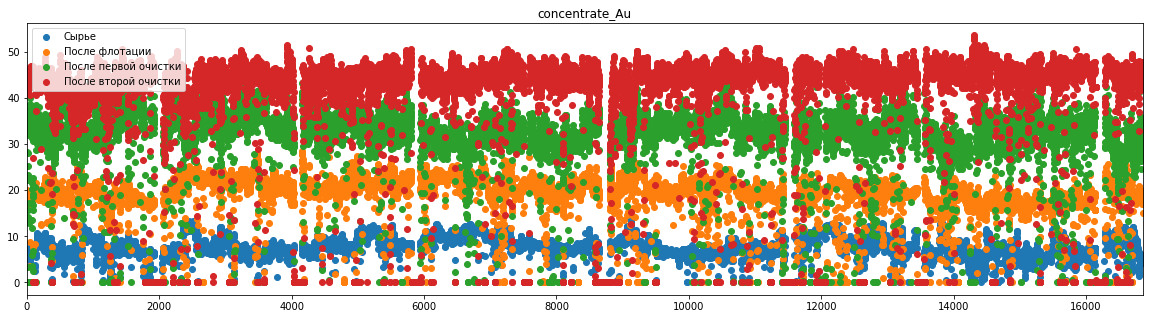

In [15]:
#сырье - rougher.input.feed_au
#после флотации - rougher.output.concentrate_au
#после первой чистки - primary_cleaner.output.concentrate_au
#после второй чистки - final.output.concentrate_au

df_train['rougher.input.feed_au'].plot(figsize = (20,5), style = 'o')
df_train['rougher.output.concentrate_au'].plot(figsize = (20,5), style = 'o')
df_train['primary_cleaner.output.concentrate_au'].plot(figsize = (20,5), style = 'o')
df_train['final.output.concentrate_au'].plot(figsize = (20,5), style = 'o')
plt.title('concentrate_Au')
plt.legend(['Сырье', 'После флотации','После первой очистки','После второй очистки'])
plt.show()

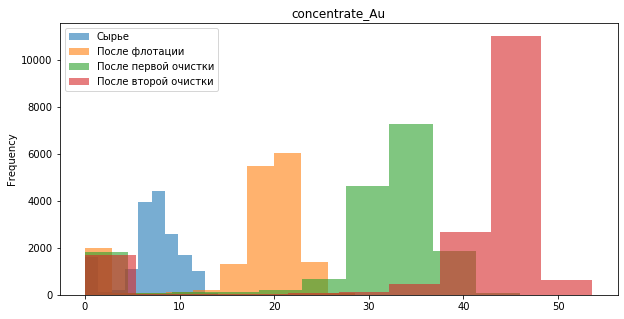

In [16]:
df_train['rougher.input.feed_au'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['rougher.output.concentrate_au'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['primary_cleaner.output.concentrate_au'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['final.output.concentrate_au'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
plt.title('concentrate_Au')
plt.legend(['Сырье', 'После флотации','После первой очистки','После второй очистки'])
plt.show()

1. С каждой последующей очисткой концентрат золота явно увеличивается, что логично, т.к. отсеиваются остальные вещества
2. Разница в концентрации может быть почти в пять раз

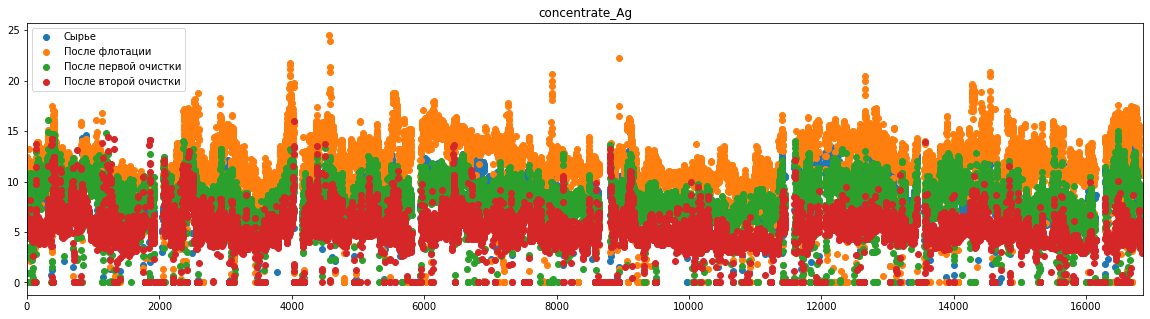

In [17]:
#сырье - rougher.input.feed_ag
#после флотации - rougher.output.concentrate_ag
#после первой чистки - primary_cleaner.output.concentrate_ag
#после второй чистки - final.output.concentrate_ag

df_train['rougher.input.feed_ag'].plot(figsize = (20,5), style = 'o')
df_train['rougher.output.concentrate_ag'].plot(figsize = (20,5), style = 'o')
df_train['primary_cleaner.output.concentrate_ag'].plot(figsize = (20,5), style = 'o')
df_train['final.output.concentrate_ag'].plot(figsize = (20,5), style = 'o')
plt.title('concentrate_Ag')
plt.legend(['Сырье', 'После флотации','После первой очистки','После второй очистки'])
plt.show()


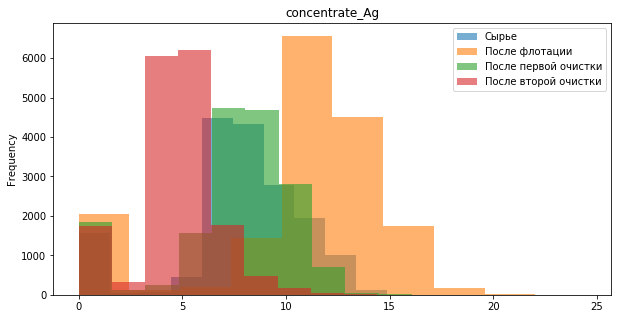

In [18]:
df_train['rougher.input.feed_ag'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['rougher.output.concentrate_ag'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['primary_cleaner.output.concentrate_ag'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['final.output.concentrate_ag'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
plt.title('concentrate_Ag')
plt.legend(['Сырье', 'После флотации','После первой очистки','После второй очистки'])
plt.show()

После каждого этапа очистки концентрация серебра уменьшается, в конечном итоге она почти в два раза меньше, чем после флотации

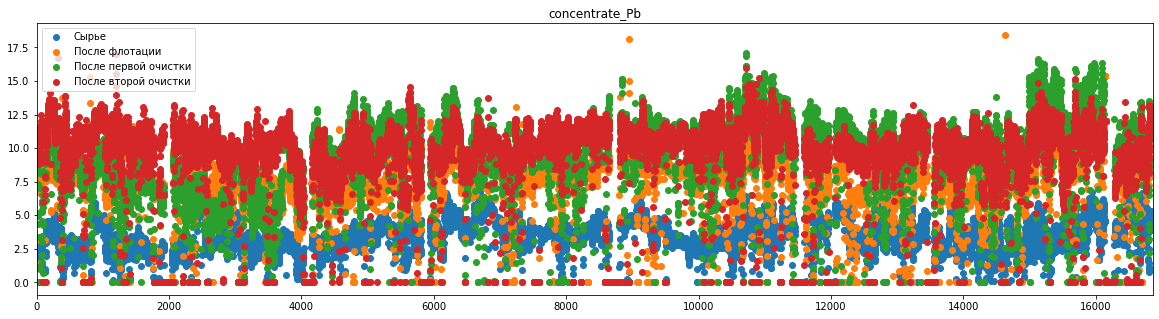

In [19]:
#сырье - rougher.input.feed_pb
#после флотации - rougher.output.concentrate_pb
#после первой чистки - primary_cleaner.output.concentrate_pb
#после второй чистки - final.output.concentrate_pb

df_train['rougher.input.feed_pb'].plot(figsize = (20,5), style = 'o')
df_train['rougher.output.concentrate_pb'].plot(figsize = (20,5), style = 'o')
df_train['primary_cleaner.output.concentrate_pb'].plot(figsize = (20,5), style = 'o')
df_train['final.output.concentrate_pb'].plot(figsize = (20,5), style = 'o')
plt.title('concentrate_Pb')
plt.legend(['Сырье', 'После флотации','После первой очистки','После второй очистки'])
plt.show()


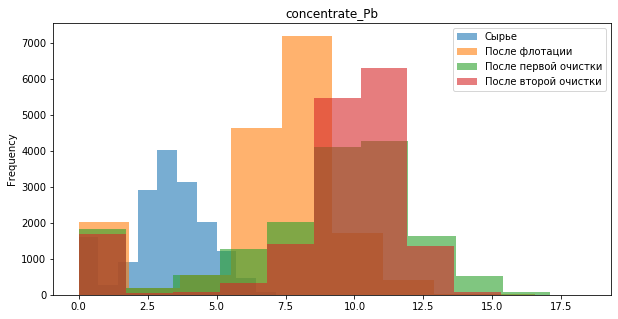

In [20]:
df_train['rougher.input.feed_pb'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['rougher.output.concentrate_pb'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['primary_cleaner.output.concentrate_pb'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
df_train['final.output.concentrate_pb'].plot(kind = 'hist', alpha = 0.6, figsize = (10,5))
plt.title('concentrate_Pb')
plt.legend(['Сырье', 'После флотации','После первой очистки','После второй очистки'])
plt.show()

Концентрация свинца меняется не так активно, как в случае с концетрацией золота или серебра

2.2. Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

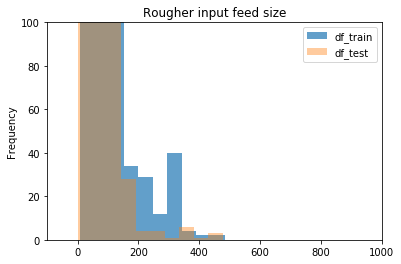

In [21]:
# столбцы с размерами гранул rougher.input.feed_size, primary_cleaner.input.feed_size

df_train['rougher.input.feed_size'].plot(kind = 'hist', alpha = 0.7)
df_test['rougher.input.feed_size'].plot(kind = 'hist', alpha = 0.4)
plt.xlim(-100,1000)
plt.ylim(0, 100)
plt.legend(['df_train', 'df_test'])
plt.title('Rougher input feed size')
plt.show()

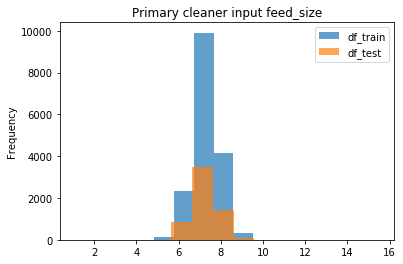

In [22]:
df_train['primary_cleaner.input.feed_size'].plot(kind = 'hist', alpha = 0.7)
df_test['primary_cleaner.input.feed_size'].plot(kind = 'hist', alpha = 0.7)
plt.legend(['df_train', 'df_test'])
plt.title('Primary cleaner input feed_size')
plt.show()

2.3. Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

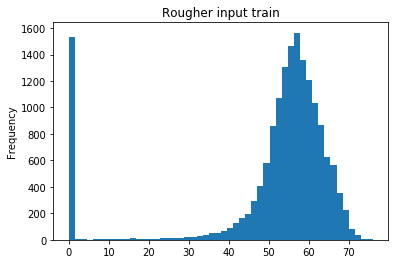

In [23]:
# сырье - rougher.input.feed_ag
# черновой - rougher.output.concentrate_ag
# финальный - final.output.concentrate_ag
# вещества: ag, pb, au, sol

sum_rougher_input_train = (df_train['rougher.input.feed_ag'] + 
                     df_train['rougher.input.feed_pb'] + 
                     df_train['rougher.input.feed_au'] + 
                     df_train['rougher.input.feed_sol']
)
sum_rougher_input_train.plot(kind = 'hist', bins = 50, title = 'Rougher input train')

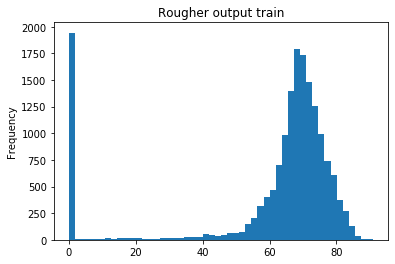

In [24]:
sum_rougher_input_train = (df_train['rougher.output.concentrate_ag'] + 
                     df_train['rougher.output.concentrate_pb'] + 
                     df_train['rougher.output.concentrate_au'] + 
                     df_train['rougher.output.concentrate_sol']
)
sum_rougher_input_train.plot(kind = 'hist', bins = 50, title = 'Rougher output train')

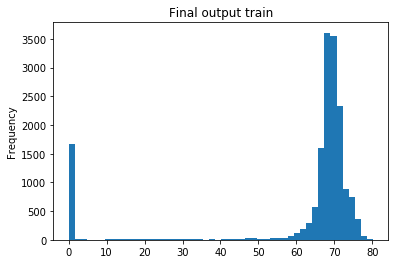

In [25]:
sum_rougher_input_train = (df_train['final.output.concentrate_ag'] + 
                     df_train['final.output.concentrate_pb'] + 
                     df_train['final.output.concentrate_au'] + 
                     df_train['final.output.concentrate_sol']
)
sum_rougher_input_train.plot(kind = 'hist', bins = 50, title = 'Final output train')

Аномалии везде у нуля, что понятно, потому что еще не разобралась с очисткой данных

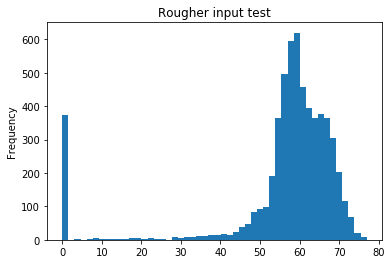

In [26]:
sum_rougher_input_test = (df_test['rougher.input.feed_ag'] + 
                     df_test['rougher.input.feed_pb'] + 
                     df_test['rougher.input.feed_au'] + 
                     df_test['rougher.input.feed_sol']
)
sum_rougher_input_test.plot(kind = 'hist', bins = 50, title = 'Rougher input test')

- Аналогично аномалия у нуля

3.1. Функция для вычисления итоговой sMAPE(метрика оценки качества прогнозирования).

In [27]:
def smape(target,predictions):
    answer = (((abs(target - predictions)) / (abs(target) + abs(predictions))/2)*100)/len(target)
    return answer

3.2. Обучение разных моделей и оценка их качества кросс-валидацией

In [28]:
df_full_for_target = df_full.fillna(method = 'bfill')
df_full_for_target['final.output.recovery'].isnull().sum()

0

In [29]:
target_train = pd.merge(dropped_train,df_full_for_target, on = 'date')
target_train = target_train['final.output.recovery']
features_train = dropped_train.drop('date', axis = 1)

In [30]:
features_test = df_test.drop('date', axis = 1)

In [ ]:
model = DecisionTreeRegressor(random_state = 12345)
model1 = RandomForestRegressor(random_state = 12345)
model2 = LinearRegression()

In [ ]:
target_test = pd.merge(df_test,df_full_for_target, on = 'date')
target_test = target_test['final.output.recovery']

In [275]:
print('Качество модели решающего дерева:', cross_val_score(model, features_test, target_test, cv=3))
print('Качество модели случайного леса:', cross_val_score(model1, features_test, target_test, cv=3))
print('Качество модели линейной регрессии:', cross_val_score(model2, features_test, target_test, cv=3))

Качество модели решающего дерева: [-0.88808676 -0.80452589 -0.6360686 ]
Качество модели случайного леса: [ 0.44932585  0.51060537 -0.03224001]
Качество модели линейной регрессии: [0.55009774 0.16429105 0.00494332]
